In [1]:
import numpy as np
import pandas as pd
# load mat file
import scipy

In [2]:
mat = scipy.io.loadmat('datasets/irmdata/uml.mat')
d = mat['Rs']
d.shape

(135, 135, 49)

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import sys

sys.path.append("/Users/aleix11alcacer/Projects/archetypes")

In [5]:
from archetypes.algorithms.torch import NAA
from models import BiAA, DBiAA
import torch

In [6]:
data = torch.tensor(d).float().reshape(d.shape)

model = NAA((14, 14, 21), d.shape, relations=[0, 0, 1], degree_correction=False, loss="normal")

model.fit(data, n_epochs=4_000, learning_rate=0.01)

  0%|          | 0/4000 [00:00<?, ?it/s]

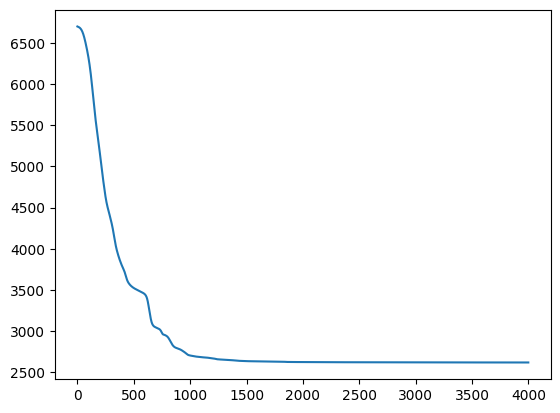

In [7]:
import matplotlib.pyplot as plt

plt.plot(model.losses)
plt.show()

In [8]:
from archetypes.visualization import heatmap
from archetypes.datasets import sort_by_archetype_similarity

In [9]:
alphas = [a.detach().numpy() for a in model.A]
estimated_archetypes = model.Z.detach().numpy()

_, info_s = sort_by_archetype_similarity(data[0, :, :], alphas[1:3], estimated_archetypes[0, :, :])

In [77]:
gnames = np.array([str(*g) for g in mat["gnames"][0]])[info_s["perms"][0]]
names = np.array([str(*n[0]) for n in mat["names"]])[info_s["perms"][0]]
labels = info_s["labels"][0]
scores = info_s["scores"][0]

In [78]:
df = pd.DataFrame({"gname": gnames, "name": names, "label": labels, "score": scores})

In [82]:
for _, df_i in df.groupby("label"):
    c = df_i.groupby("gname").count()
    print(df_i.name[df_i.score > 0.8].head(5))

0                      Conceptual_Entity
1                                 Entity
2               Occupation_or_Discipline
3                        Physical_Object
4    Biomedical_Occupation_or_Discipline
Name: name, dtype: object
50               Chemical_Viewed_Structurally
51    Nucleic_Acid,_Nucleoside,_or_Nucleotide
52                  Organophosphorus_Compound
53                               Carbohydrate
54                                      Lipid
Name: name, dtype: object
66    Organism
67    Archaeon
68      Mammal
69       Human
70     Reptile
Name: name, dtype: object
77    Laboratory_Procedure
78    Diagnostic_Procedure
Name: name, dtype: object
86    Immunologic_Factor
87              Receptor
88               Vitamin
89                Enzyme
90               Hormone
Name: name, dtype: object
94    Organ_or_Tissue_Function
95           Organism_Function
96               Cell_Function
97          Molecular_Function
98              Mental_Process
Name: name, dtype: object


In [72]:
np.unique(gnames)

array(['Activities_&_Behaviors', 'Anatomy', 'Chemicals_&_Drugs',
       'Concepts_&_Ideas', 'Devices', 'Disorders',
       'Genes_&_Molecular_Sequences', 'Geographic_Areas', 'Living_Beings',
       'Objects', 'Occupations', 'Organizations', 'Phenomena',
       'Physiology', 'Procedures'], dtype='<U27')